# Week 4 - Univariate Analysis, part 2

# 1. Lesson - None

# 2. Weekly graph question

Below are a histogram and boxplot representation of the same data. A pharmacy is keeping a record of the prices of the drugs that it sells, and an administrator wants to know how much the more expensive drugs tend to cost, in the context of the other prices.

Please write a short explanation of the pros and cons of these two representations. Which would you choose? How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?

In [1]:
import numpy as np
import pandas as pd

np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size = num_data) * 4)
df = pd.DataFrame(data.T, columns = ["data"])

The 75th percentile is: data    15.457656
Name: 0.75, dtype: float64


<Axes: ylabel='Frequency'>

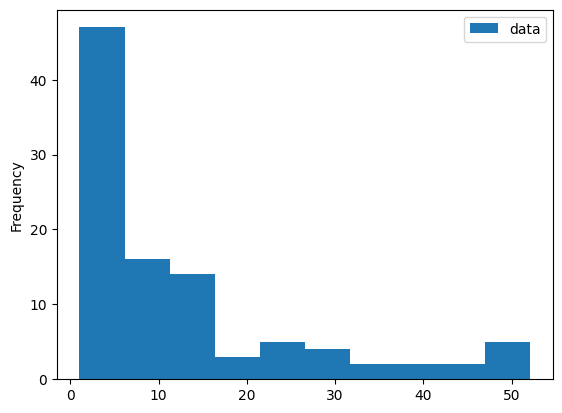

In [2]:
print("The 75th percentile is:", df.quantile(q = 0.75))
df.plot.hist()

<Axes: >

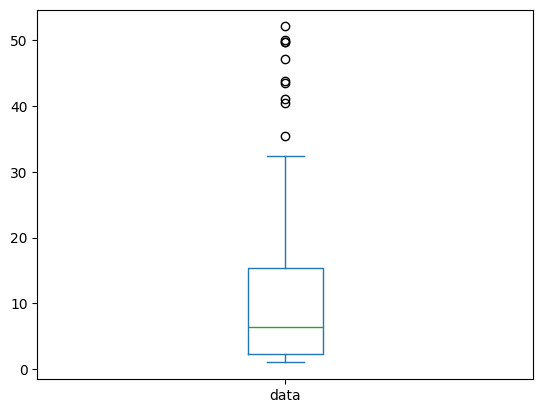

In [3]:
df.plot.box()

I don't find either plot particularly engaging for answering the original question. Both visuals lack significant context without titles, axes, or visuals that clearly highlight high priced drugs.I find the histogram slightly better as you can clearly see the long tail of expensive drugs and the high frequency of drugs under $15. The box plot does show the outliers but they overlap and it's difficult to see the frequency across the population.

# 3. Homework - working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

- Draw grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.

- Draw a bar plot to indicate total counts of each categorical variable in a given column.

- Find means, medians, and modes.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?

- Are there any outliers present?  (Data points that are far from the others.)

- If there are multiple related histograms, how does the distribution change across different groups?

- What are the minimum and maximum values represented in each histogram?

- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?

- Does the distribution appear normal, or does it have a different distribution?

In [5]:
df = pd.read_csv("priceline_clean.csv")

Statistics for travel_time_minutes:
Mean: 1551.063440422936, Median: 1430.0, Mode: 965.0



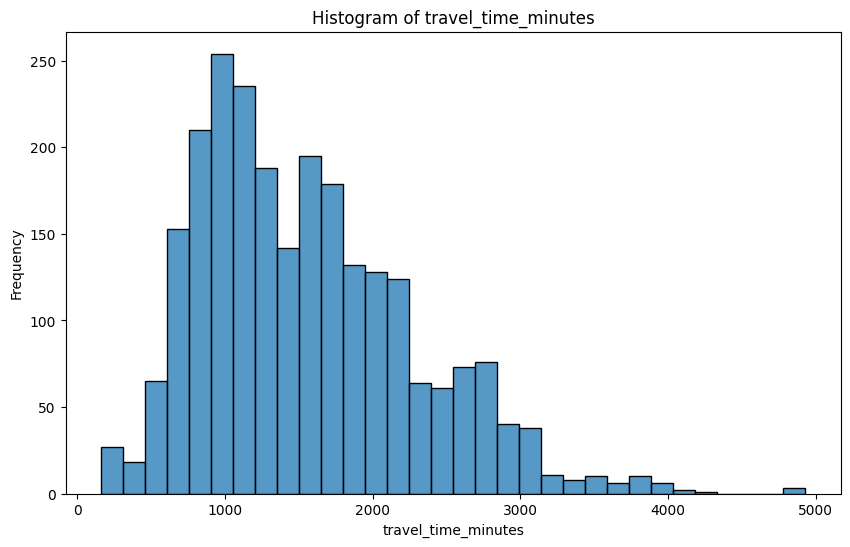

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_46036\3673827209.py:30: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


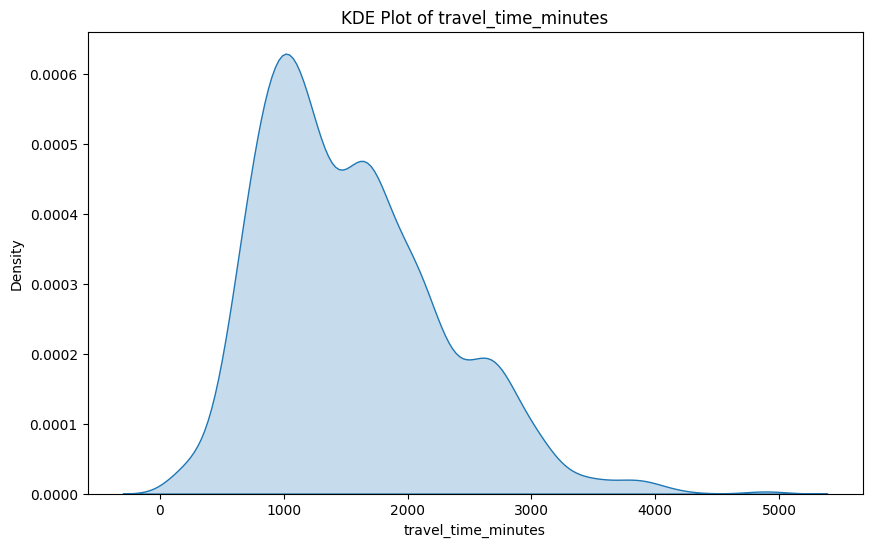

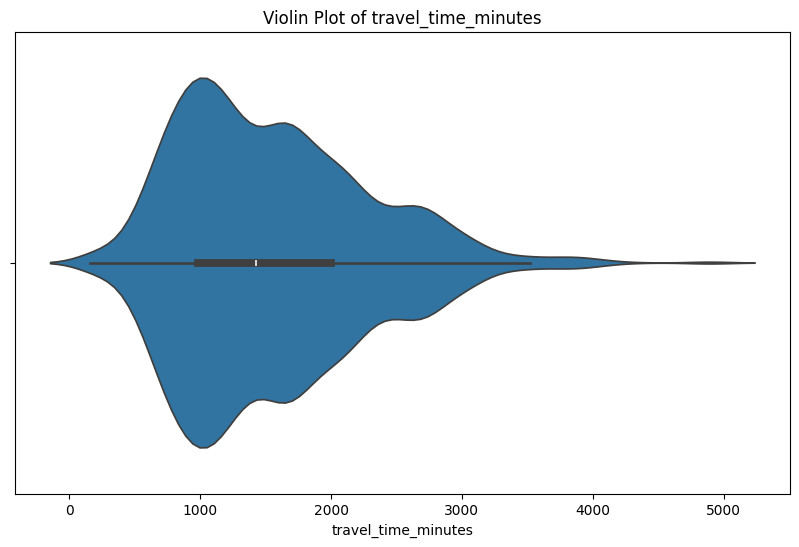

C:\Users\tyler.brantingham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\categorical.py:3399: UserWarning: 12.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


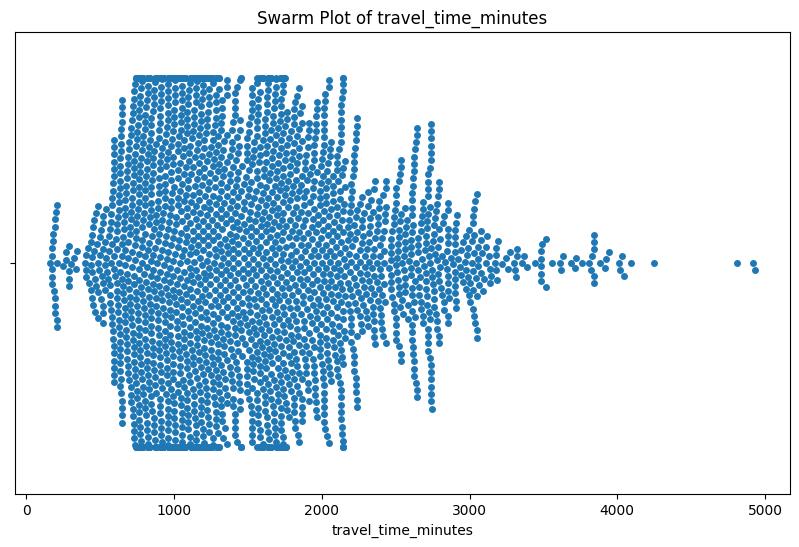

Statistics for 1st_stop_wait_minutes:
Mean: 510.92211578508955, Median: 424.0, Mode: 130.0



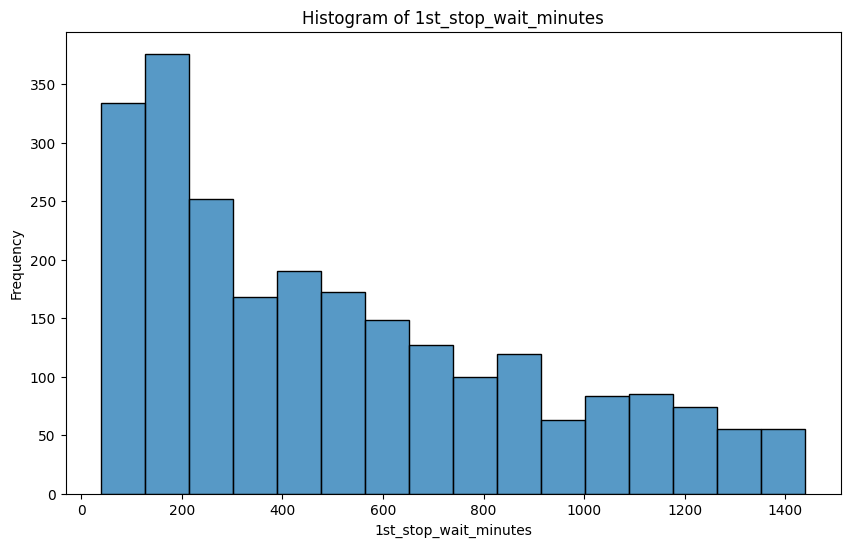

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_46036\3673827209.py:30: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


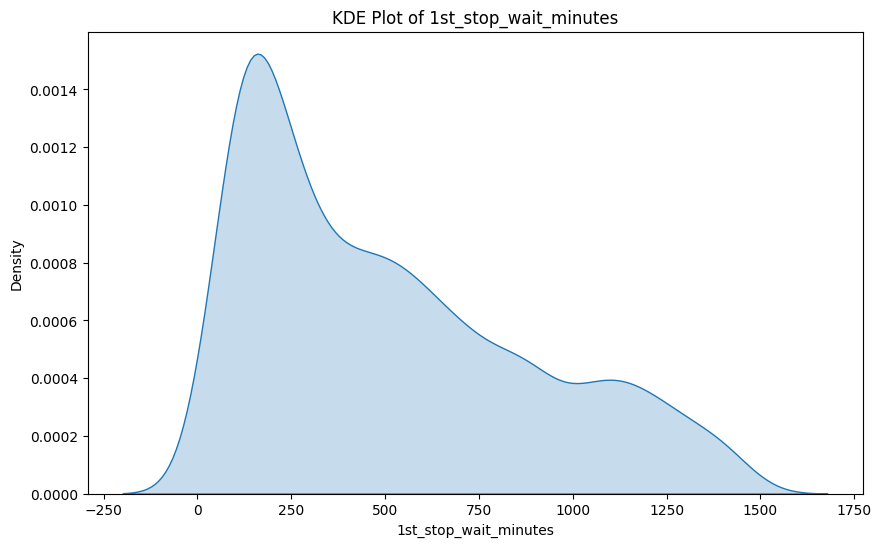

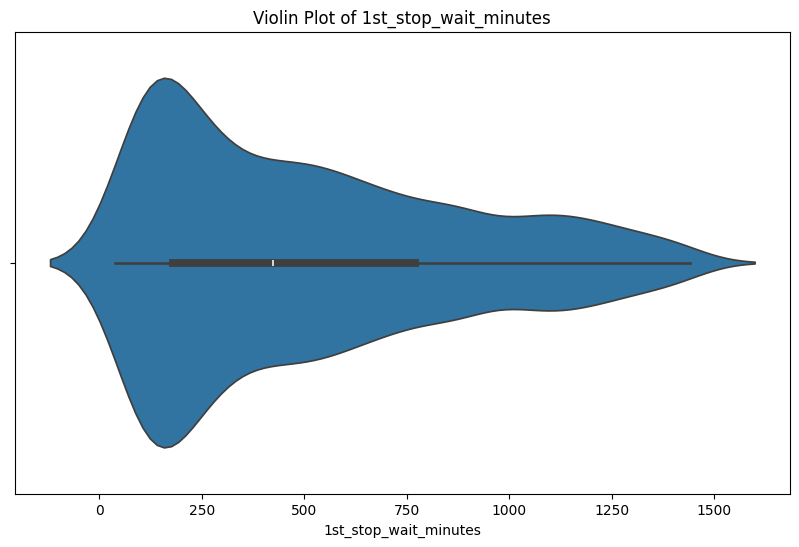

C:\Users\tyler.brantingham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\categorical.py:3399: UserWarning: 7.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


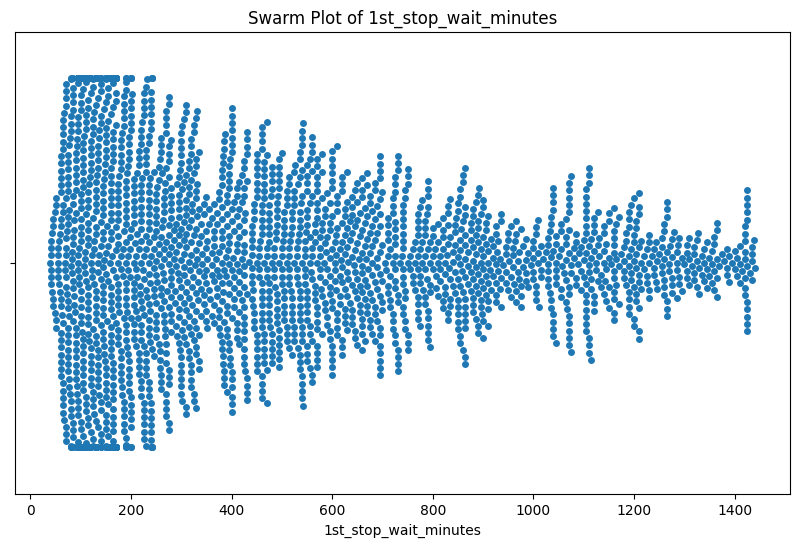

Statistics for 2nd_stop_wait_minutes:
Mean: 426.1085626911315, Median: 260.0, Mode: 240.0



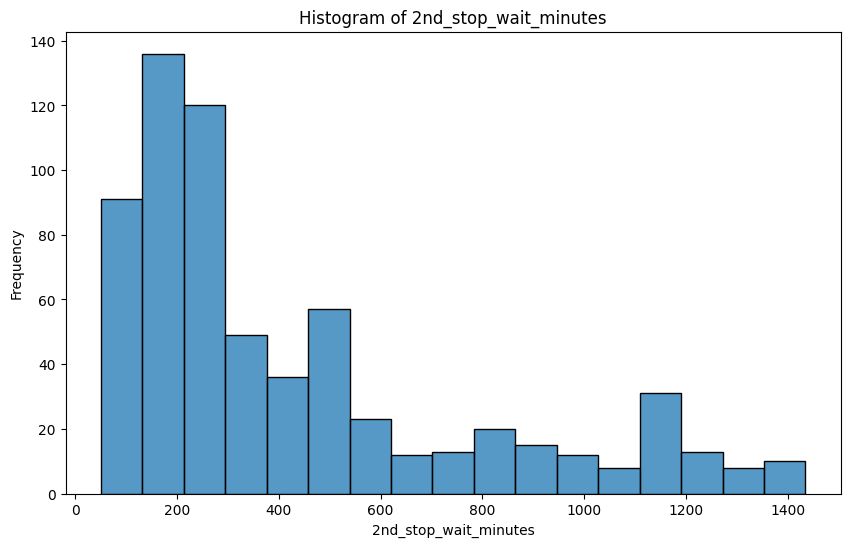

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_46036\3673827209.py:30: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


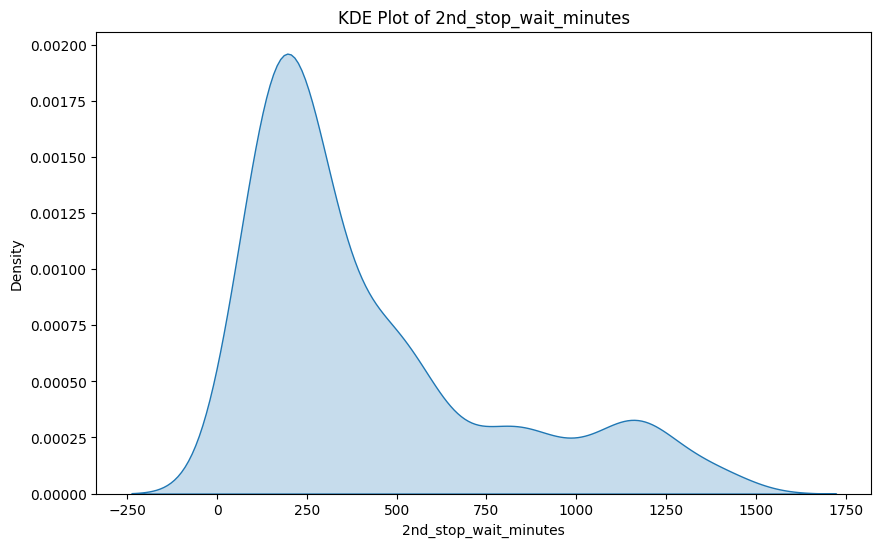

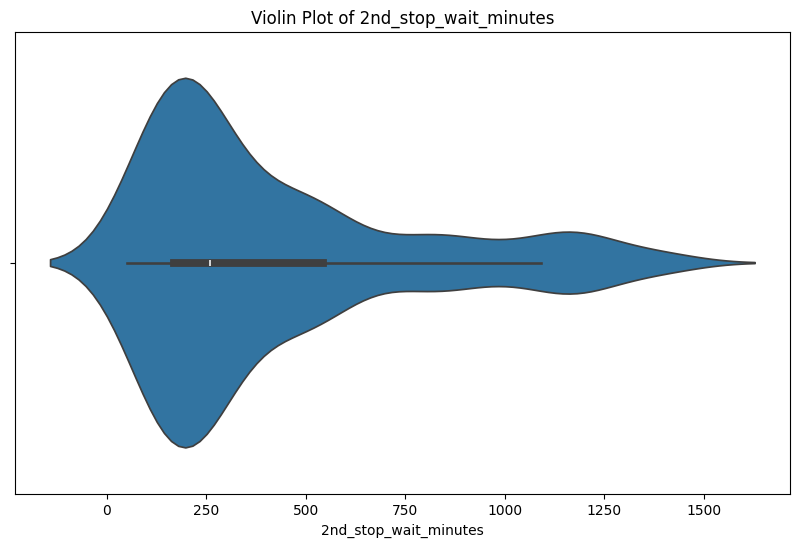

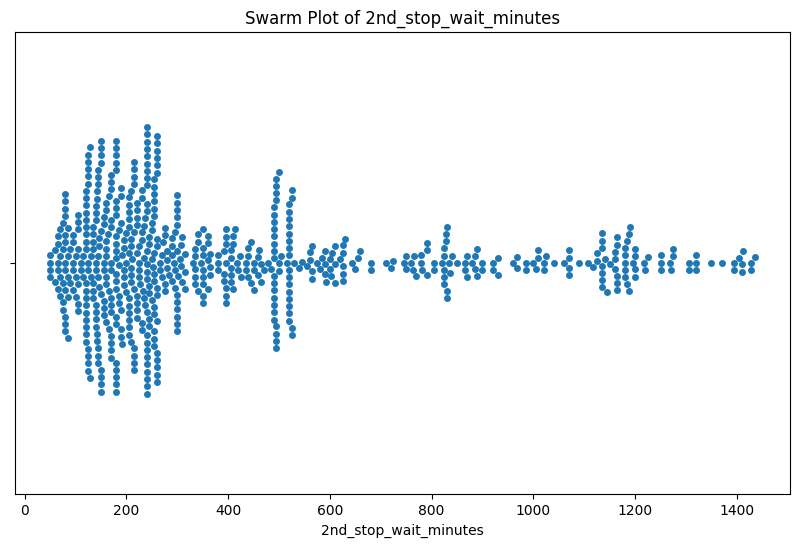

Statistics for 3rd_stop_wait_minutes:
Mean: 356.7647058823529, Median: 200.0, Mode: 200.0



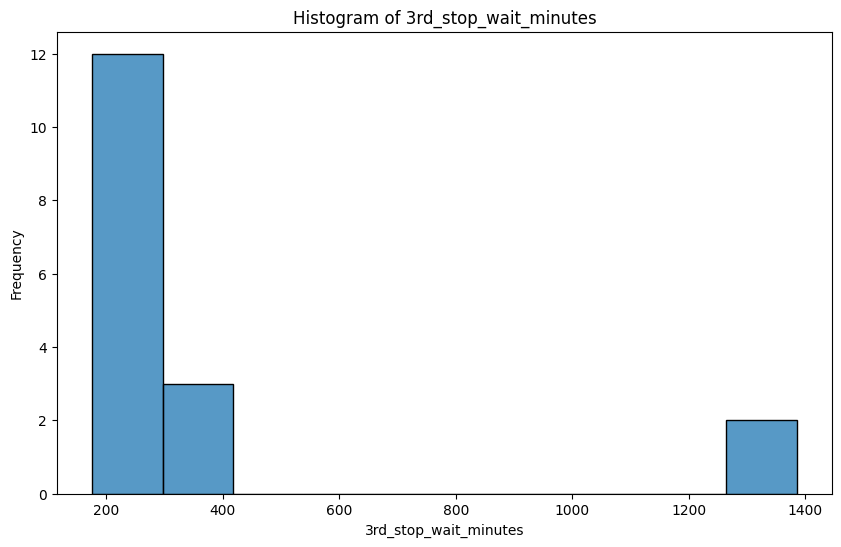

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_46036\3673827209.py:30: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


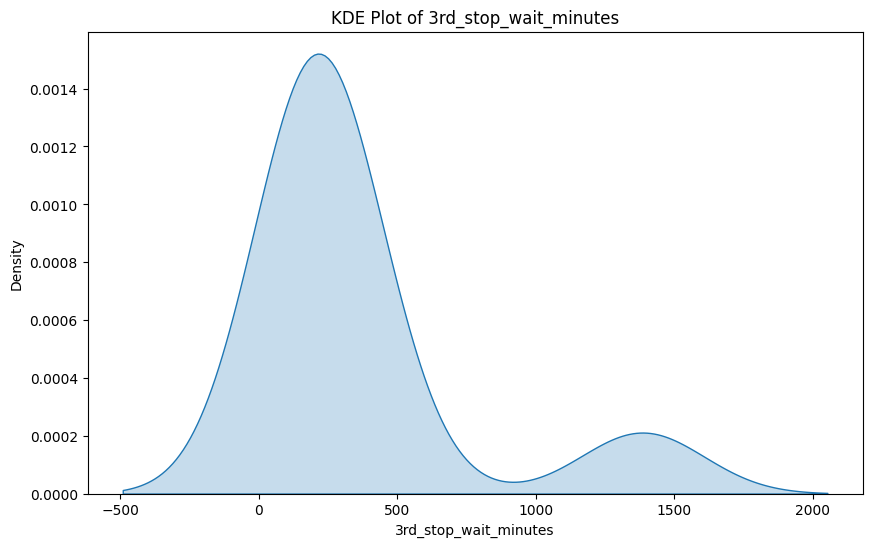

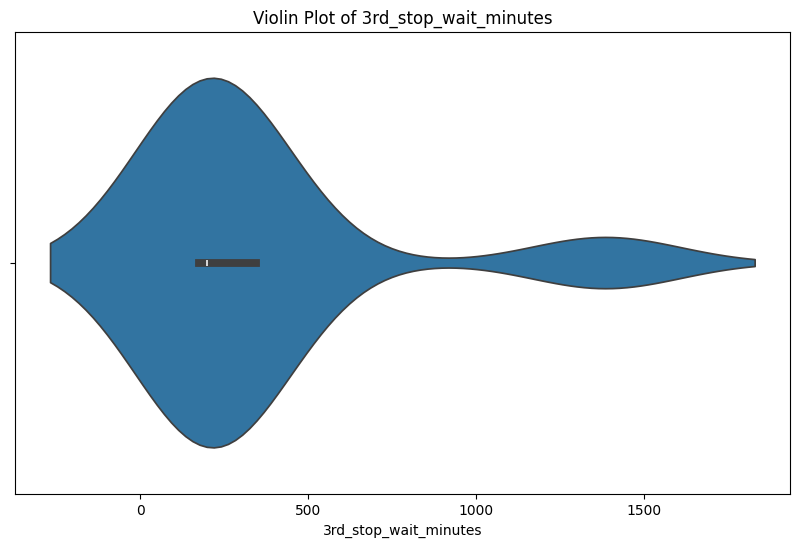

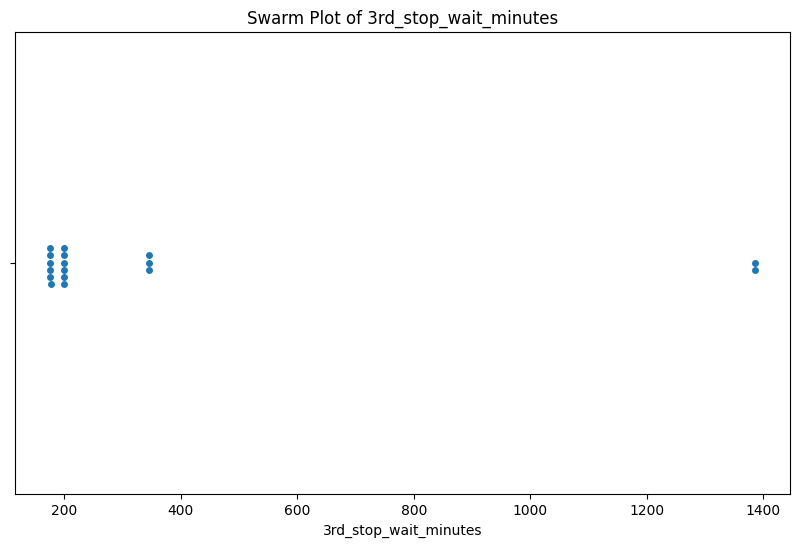

Statistics for stops:
Mean: 1.294428629524197, Median: 1.0, Mode: 1.0



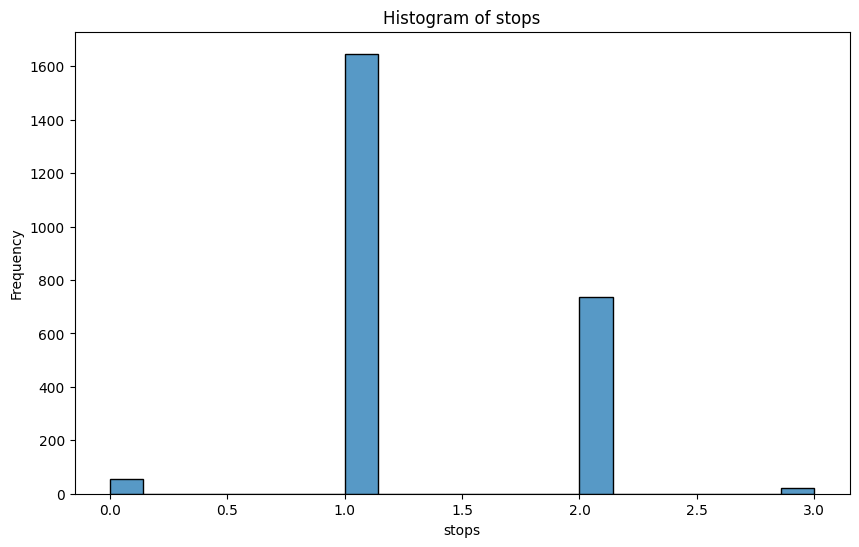

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_46036\3673827209.py:30: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


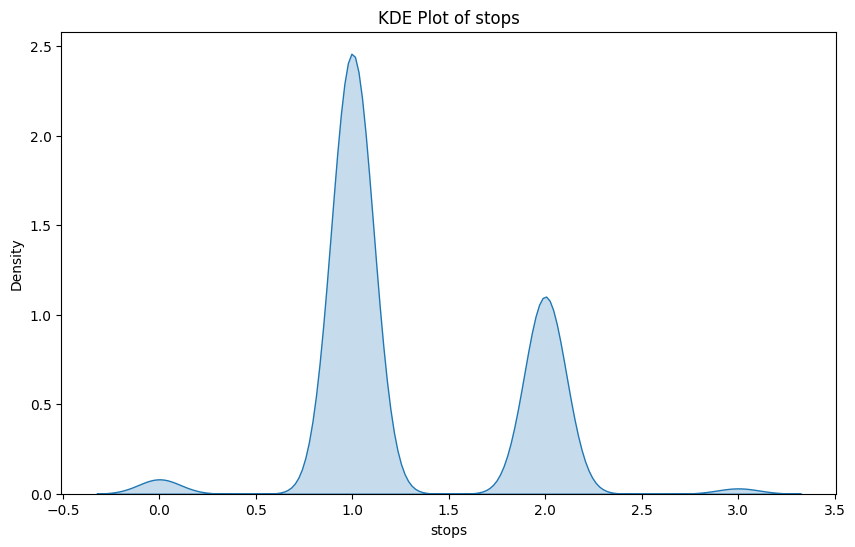

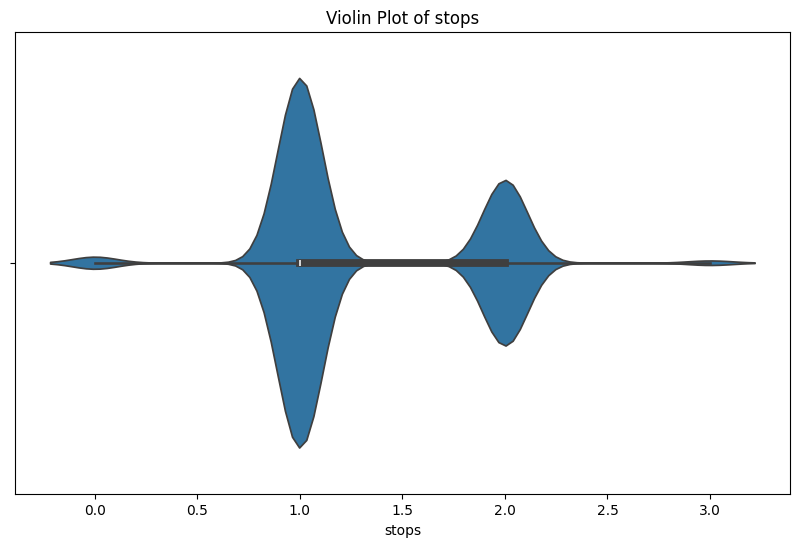

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Function to calculate mean, median, and mode
def calculate_statistics(column):
    mean = df[column].mean()
    median = df[column].median()
    mode = df[column].mode().values[0] if not df[column].mode().empty else np.nan
    return mean, median, mode

# Iterate over each numeric column
for column in df.select_dtypes(include=[np.number]).columns:
    print(f"Statistics for {column}:")
    mean, median, mode = calculate_statistics(column)
    print(f"Mean: {mean}, Median: {median}, Mode: {mode}\n")
    
    # Histogram
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=False)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()
    
    # KDE plot
    plt.figure(figsize=(10, 6))
    sns.kdeplot(df[column], shade=True)
    plt.title(f'KDE Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.show()
    
    # Violin plot
    plt.figure(figsize=(10, 6))
    sns.violinplot(x=df[column])
    plt.title(f'Violin Plot of {column}')
    plt.xlabel(column)
    plt.show()
    
    # # Swarm plot
    # plt.figure(figsize=(10, 6))
    # sns.swarmplot(x=df[column])
    # plt.title(f'Swarm Plot of {column}')
    # plt.xlabel(column)
    # plt.show()





# 4. Storytelling With Data graph

Reproduce any graph of your choice in p. 52-68 of the Storytelling With Data book as best you can.  (The second half of chapter two).  You do not have to get the exact data values right, just the overall look and feel.